# EDA Pollution

**Author:** Casey Kellett Whitwham

## Key Features:
 - **Temperature (°C):** Average temperature of the region.
 - **Humidity (%):** Relative humidity recorded in the region.
 - **PM2.5 Concentration (µg/m³):** Fine particulate matter levels.
 - **PM10 Concentration (µg/m³):** Coarse particulate matter levels.
 - **NO2 Concentration (ppb):** Nitrogen dioxide levels.
 - **SO2 Concentration (ppb):** Sulfur dioxide levels.
 - **CO Concentration (ppm):** Carbon monoxide levels.
 - **Proximity to Industrial Areas (km):**** Distance to the nearest industrial zone.
 - **Population Density (people/km²):** Number of people per square kilometer in the region.
 
 **Target Variable: Air Quality Levels**

  - **Good:** Clean air with low pollution levels.
  - **Moderate:** Acceptable air quality but with some pollutants present.
  - **Poor:** Noticeable pollution that may cause health issues for sensitive groups.
  - **Hazardous:** Highly polluted air posing serious health risks to the population.


---

Imports

---

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import importlib

import dataprep as dp
importlib.reload(dp)

<module 'dataprep' from 'c:\\Users\\casey\\OneDrive\\Documents\\GitHub\\Pollution-Kaggle\\dataprep.py'>

---

Load Data

---

5000 rows
10 columns

In [37]:
df = dp.load_data()

Df Shape: (5000, 10)


--------------------------------------------------------------------------------------------------------------------------------------------

Sample of 10 datapoints.

--------------------------------------------------------------------------------------------------------------------------------------------

In [38]:
df.sample(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
1347,21.3,48.3,2.4,5.8,15.5,6.3,1.08,10.5,296,Good
146,47.3,88.4,104.9,127.4,44.6,21.7,2.71,8.2,648,Hazardous
3676,23.8,50.1,11.6,16.5,14.1,3.6,0.91,10.5,483,Good
507,31.7,58.9,36.2,39.9,20.5,5.7,0.94,14.0,565,Good
3755,23.2,71.8,56.0,70.0,26.3,14.6,1.69,5.7,392,Moderate
2484,26.9,72.7,7.5,24.3,23.9,15.1,1.67,5.2,454,Moderate
3701,29.0,50.4,4.8,18.9,26.4,9.4,1.75,9.0,302,Moderate
2929,38.2,82.1,8.4,26.5,24.6,7.4,2.60,5.2,696,Poor
3189,40.1,58.4,5.0,13.4,27.5,10.3,1.91,4.7,616,Poor
2197,30.7,53.5,4.9,11.5,22.9,8.8,0.98,13.7,429,Good


--------------------------------------------------------------------------------------------------------------------------------------------

Display table of unique values.

--------------------------------------------------------------------------------------------------------------------------------------------

In [39]:
unique = df.nunique().sort_values()
unique_values = df.apply(pd.Series.unique)
unique_values_list = []
for column in df.columns:
    unique_values_list.append(', '.join(map(str, unique_values[column])))

unique_df = pd.DataFrame({'Number of Unique Values': unique,'Unique Values': unique_values_list})
unique_df

,Number of Unique Values,Unique Values
Air Quality,4,"29.8, 28.3, 23.1, 27.1, 26.5, 39.4, 41.7, 31.0..."
Proximity_to_Industrial_Areas,179,"59.1, 75.6, 74.7, 39.1, 70.7, 96.6, 82.5, 59.6..."
CO,265,"5.2, 2.3, 26.7, 6.1, 6.9, 14.6, 1.7, 5.0, 10.3..."
SO2,348,"17.9, 12.2, 33.8, 6.3, 16.0, 35.5, 15.8, 16.8,..."
Temperature,362,"18.9, 30.8, 24.4, 13.5, 21.9, 42.9, 31.1, 24.2..."
NO2,445,"9.2, 9.7, 12.6, 5.3, 5.6, 17.9, 12.7, 13.6, 11..."
Population_Density,683,"1.72, 1.64, 1.63, 1.15, 1.01, 1.82, 1.8, 1.38,..."
Humidity,723,"6.3, 6.0, 5.2, 11.1, 12.7, 3.1, 4.6, 5.4, 4.9,..."
PM2.5,815,"319, 611, 619, 551, 303, 674, 735, 443, 486, 5..."
PM10,955,"Moderate, Good, Hazardous, Poor"


----------------------------------------------

Misc Information

---

- Only categorical column is target variable (Air Quality)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


---

Missing Values Visualization

---

- No Missing Values

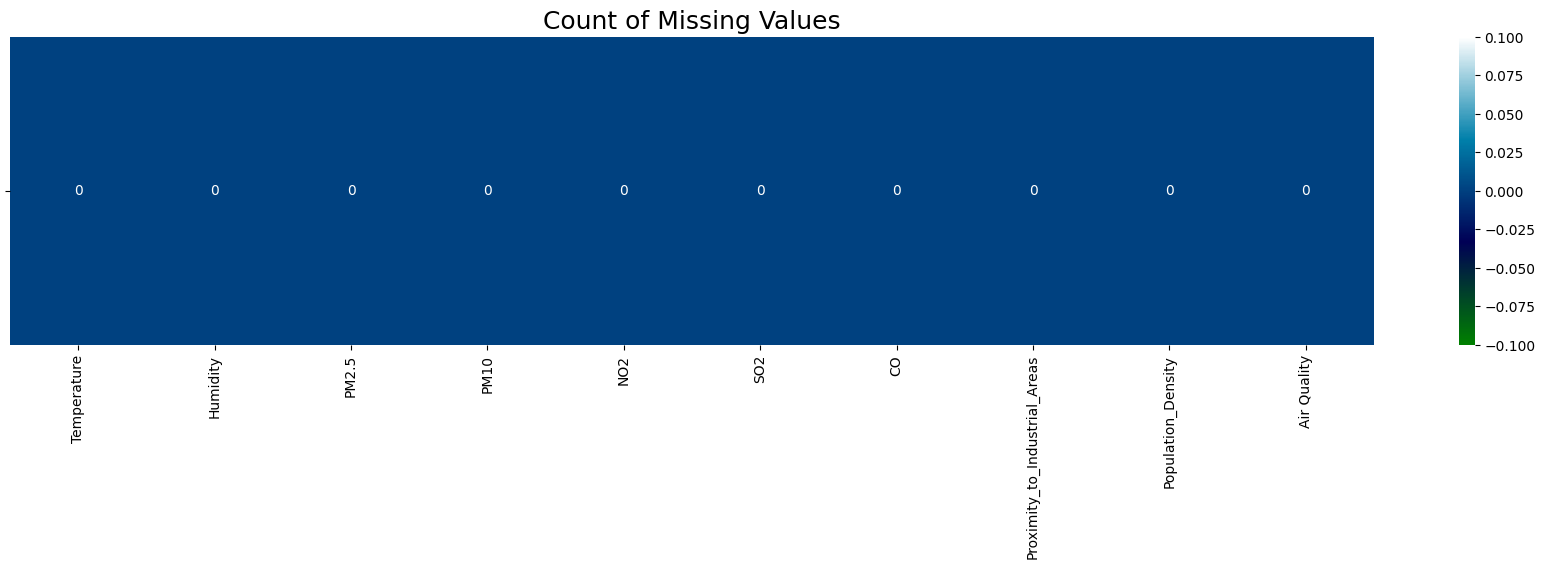

In [41]:
plt.figure(figsize=(22, 4))  
sns.heatmap(
    (df.isna().sum()).to_frame(name='').T,  
    cmap='ocean',                         
    annot=True,                             
    fmt='0.0f'                             
).set_title('Count of Missing Values', fontsize=18)  
plt.show() 

---

Duplicate rows

---

 - No Duplicate Rows

In [42]:
df.duplicated().sum()

0

---

Basic statistics on data

---


- Some extreme or negative values in certain variables (like PM10 and SO2) suggest the need for data cleaning or validation. High Max Values compared to mean (outliers).

In [43]:
df.describe().T.style.background_gradient(cmap='ocean', axis=1)

,count,mean,std,min,25%,50%,75%,max
Temperature,5000.000000,30.029020,6.720661,13.400000,25.100000,29.000000,34.000000,58.600000
Humidity,5000.000000,70.056120,15.863577,36.000000,58.300000,69.800000,80.300000,128.100000
PM2.5,5000.000000,20.142140,24.554546,0.000000,4.600000,12.000000,26.100000,295.000000
PM10,5000.000000,30.218360,27.349199,-0.200000,12.300000,21.700000,38.100000,315.800000
NO2,5000.000000,26.412100,8.895356,7.400000,20.100000,25.300000,31.900000,64.900000
SO2,5000.000000,10.014820,6.750303,-6.200000,5.100000,8.000000,13.725000,44.900000
CO,5000.000000,1.500354,0.546027,0.650000,1.030000,1.410000,1.840000,3.720000
Proximity_to_Industrial_Areas,5000.000000,8.425400,3.610944,2.500000,5.400000,7.900000,11.100000,25.800000
Population_Density,5000.000000,497.423800,152.754084,188.000000,381.000000,494.000000,600.000000,957.000000


---

Unique values by column

---

In [44]:
df.apply(pd.Series.nunique)

Temperature                      362
Humidity                         723
PM2.5                            815
PM10                             955
NO2                              445
SO2                              348
CO                               265
Proximity_to_Industrial_Areas    179
Population_Density               683
Air Quality                        4
dtype: int64

---

Numerical column correlation matrix

---

 - Temperature, NO2, SO2, and CO tend to be positively correlated with each other, indicating that these factors often rise together.
 - M2.5 and PM10 are also highly correlated with each other.
 - Proximity to Industrial Areas has negative correlations with many variables, suggesting industrial areas tend to have different environmental and demographic characteristics.
 - Population Density shows moderate positive correlations with temperature and pollutants, implying more populated areas may experience higher pollution levels.

In [45]:
df.corr(numeric_only=True).T.style.background_gradient(cmap='ocean', axis=1)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
Temperature,1.000000,0.466456,0.323840,0.425690,0.591969,0.568082,0.685258,-0.589564,0.481692
Humidity,0.466456,1.000000,0.273366,0.359156,0.491977,0.459804,0.567540,-0.479646,0.411630
PM2.5,0.323840,0.273366,1.000000,0.973005,0.333004,0.299582,0.395179,-0.315766,0.278957
PM10,0.425690,0.359156,0.973005,1.000000,0.439916,0.401849,0.518895,-0.425018,0.365734
NO2,0.591969,0.491977,0.333004,0.439916,1.000000,0.571839,0.710792,-0.607710,0.510938
SO2,0.568082,0.459804,0.299582,0.401849,0.571839,1.000000,0.679060,-0.570385,0.475242
CO,0.685258,0.567540,0.395179,0.518895,0.710792,0.679060,1.000000,-0.707581,0.593389
Proximity_to_Industrial_Areas,-0.589564,-0.479646,-0.315766,-0.425018,-0.607710,-0.570385,-0.707581,1.000000,-0.498058
Population_Density,0.481692,0.411630,0.278957,0.365734,0.510938,0.475242,0.593389,-0.498058,1.000000


---

Distribution of Target Variable

---

- Uneven distribution amongst classes.
    - Good -> Most Common
    - Moderate + Poor -> Middle
    - Hazardous -> Least Common

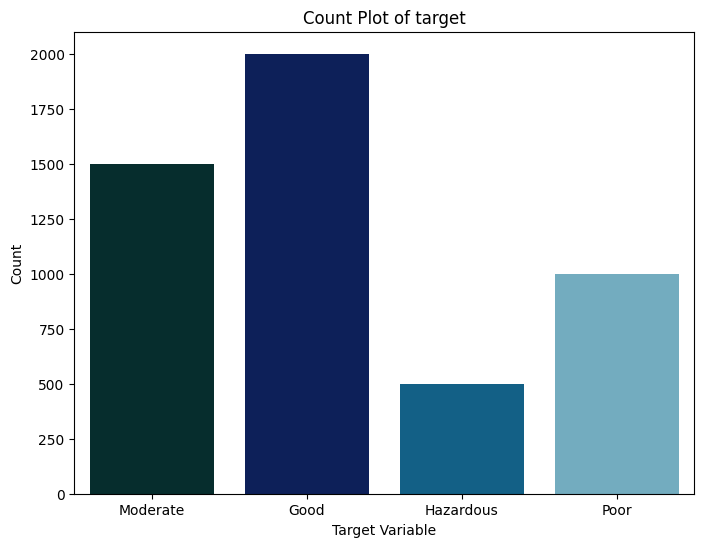

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=df["Air Quality"], palette="ocean")
plt.title(f'Count Plot of target')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

---

Distribution of Numerical Columns with Trend Line

---

- Skewness shown in PM2.5 and PM10 (Most likely due to outliers).

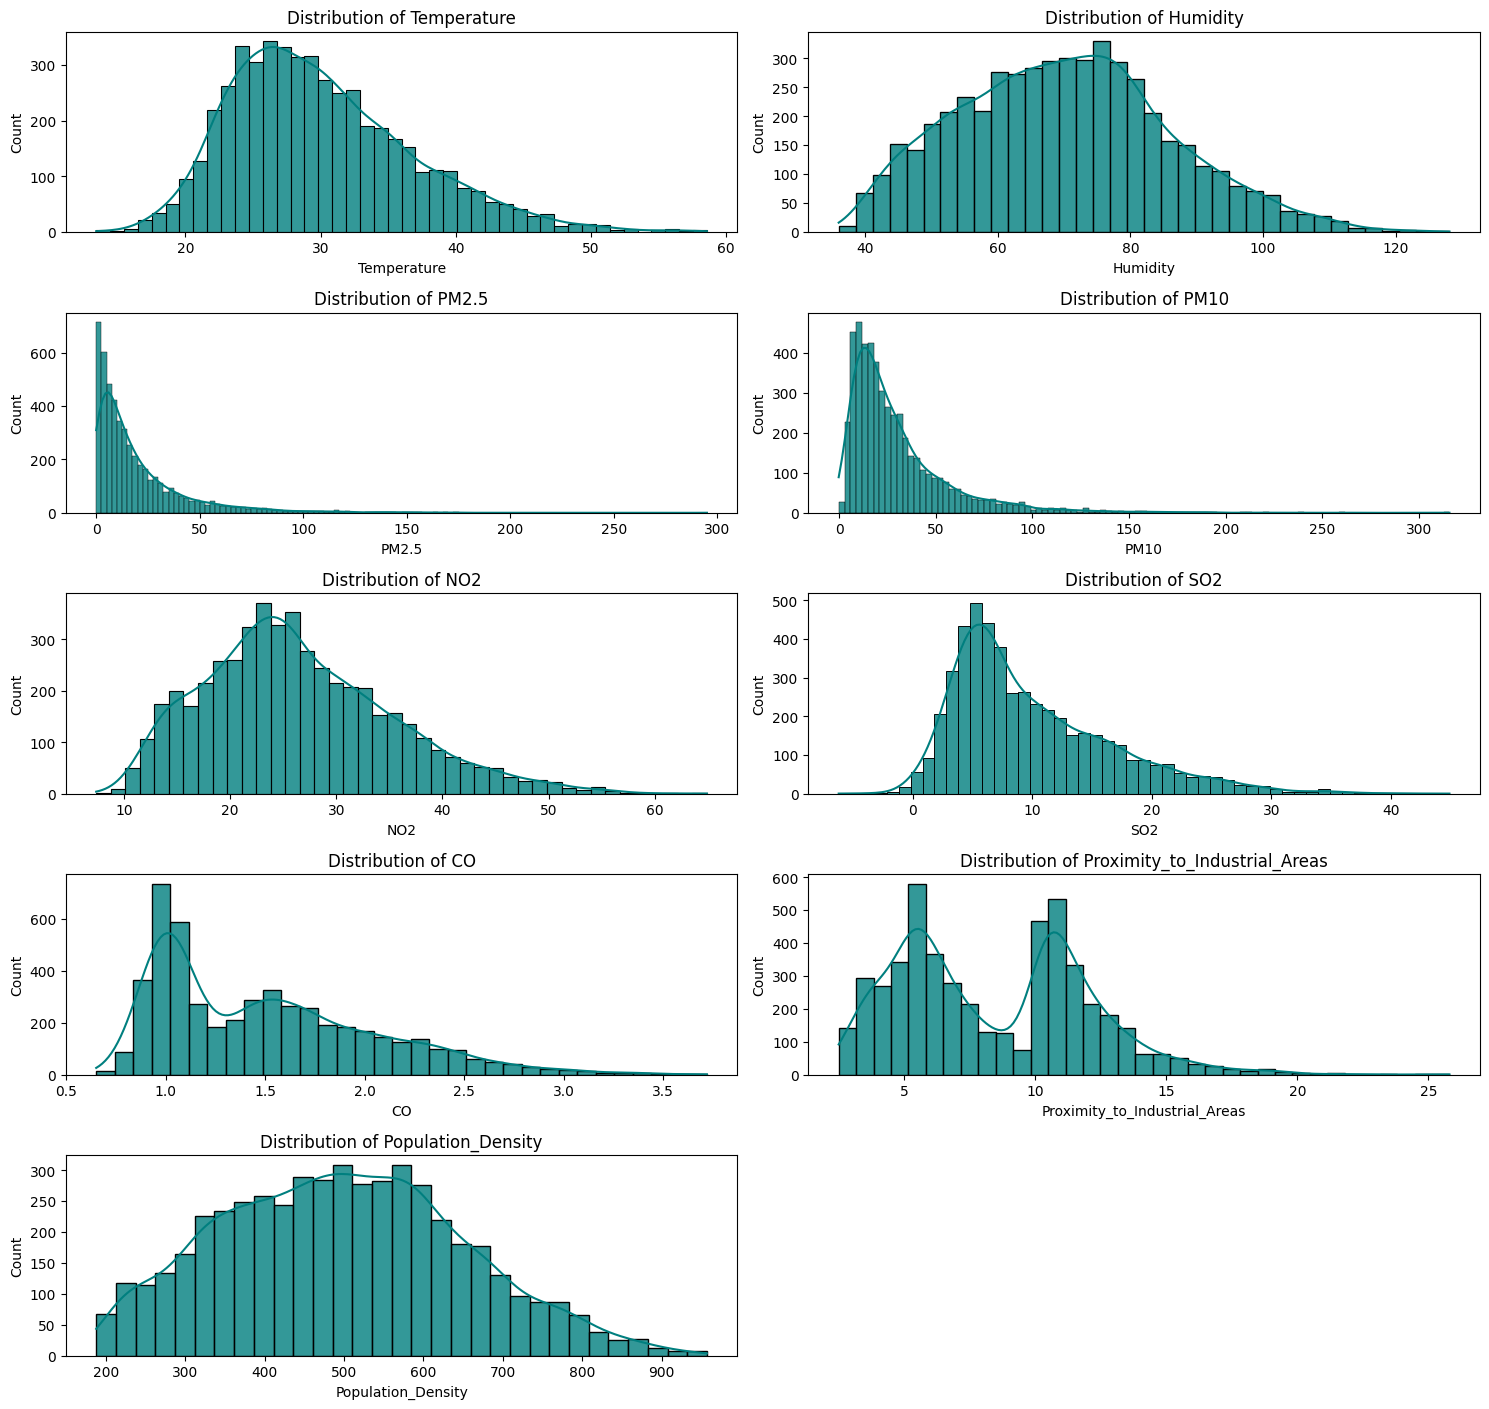

In [47]:
df_numerical = df.select_dtypes(include=['number'])

fig_width = 15
fig_height = 5 * (len(df_numerical.columns) // 2 + 1)

plt.figure(figsize=(fig_width, fig_height))

for i, col in enumerate(df_numerical.columns, 1):
    plt.subplot(len(df_numerical.columns), 2, i)
    
    sns.histplot(df[col], kde=True, color='#007f7f',alpha=0.8)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


---

Box plot of Numeric columns

---

 - Large amount of outliers on pm10 and pm2.5

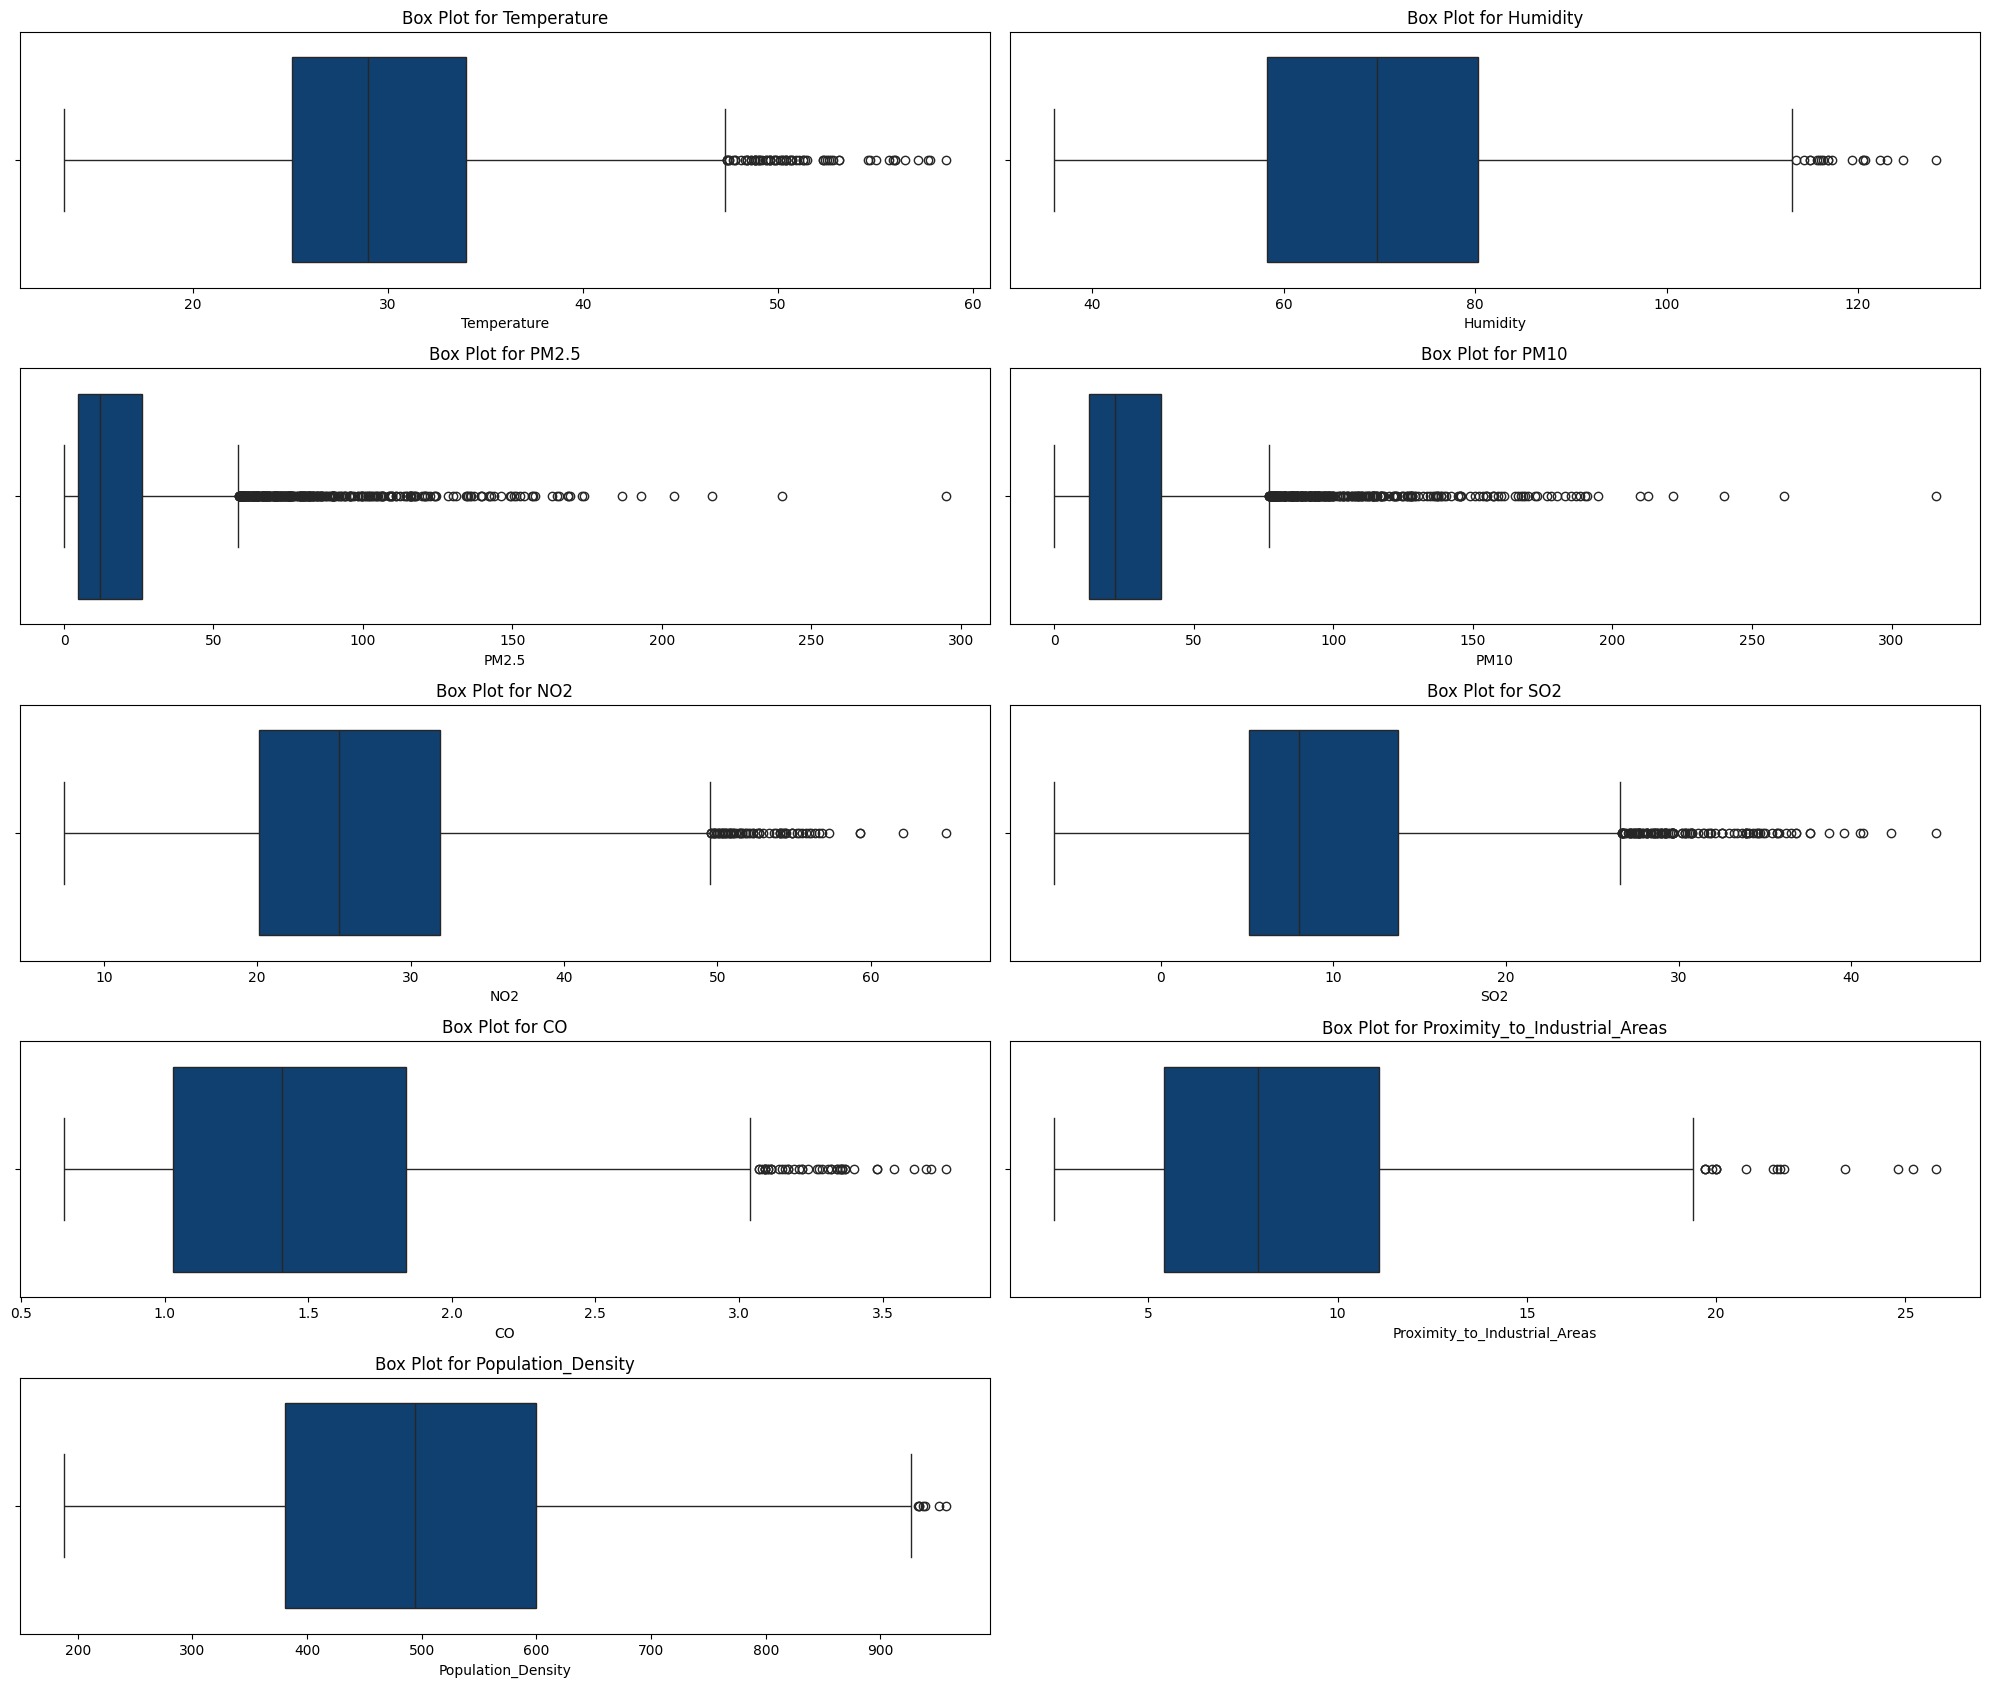

In [48]:
df_numerical = df.select_dtypes(include=['number'])

fig_width = 20 
max_fig_height = 30 
fig_height = min(4 * len(df_numerical.columns), max_fig_height)

plt.figure(figsize=(fig_width, fig_height))

for i, col in enumerate(df_numerical.columns, 1):
    plt.subplot(len(df_numerical.columns), 2, i)
    sns.boxplot(x=df[col], color=sns.color_palette("ocean", n_colors=1)[0])
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()